In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read KL evaluations
kl_user=pd.read_csv("../KL_evaluation/kl_evaluation_user_based.csv")
kl_item=pd.read_csv("../KL_evaluation/kl_evaluation_item_based.csv")
kl_user_pr=pd.read_csv("../KL_evaluation/kl_evaluation_PageRank_user_based.csv")
kl_item_pr=pd.read_csv("../KL_evaluation/kl_evaluation_PageRank_item_based.csv")

In [3]:
#All in one dataframe
kl=pd.concat([kl_user['KL'], kl_item['KL'], kl_user_pr['KL'], kl_item_pr['KL']], axis=1)
kl.columns=["User-based", "Item-based", "PR (user-based)", "PR (item-based)"]
kl["User-based"]=kl["User-based"].replace(0.0, np.nan)
kl.head()

,User-based,Item-based,PR (user-based),PR (item-based)
0,1.205265,1.636655,1.537377,1.888515
1,0.862154,1.433000,1.425941,1.696591
2,0.763170,1.483331,1.406663,1.694571
3,1.214025,1.998320,1.797659,2.179571
4,0.475415,1.011010,1.186543,1.485431


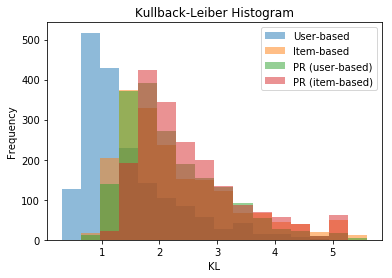

In [4]:
#Kullback-Leiber Histogram
ax=kl.plot.hist(alpha=0.5, bins=16)
ax.set_xlabel("KL")
plt.title("Kullback-Leiber Histogram")

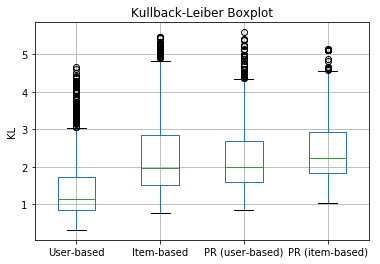

In [5]:
#Kullback-Leiber Boxplot
ax=kl.boxplot()
plt.title("Kullback-Leiber Boxplot")
ax.set_ylabel("KL")

In [6]:
kl["User-based"].mean()

1.4078147253014517

In [7]:
kl_user.head()

,Cliente,KL
0,95,1.205265
1,10131,0.862154
2,10188,0.763170
3,10262,1.214025
4,10362,0.475415


In [8]:
%store -r ratings
%store -r pred_df

In [9]:
#Identify columns
import re
r = re.compile("^A")
area_colnames = filter(r.match, ratings.columns)

In [10]:
#Kullback-Leiber function
def kl(p, q):
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))

In [11]:
posible_users=kl_user[(kl_user["KL"]<1.5) & (kl_user["KL"]>1.3)]

/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


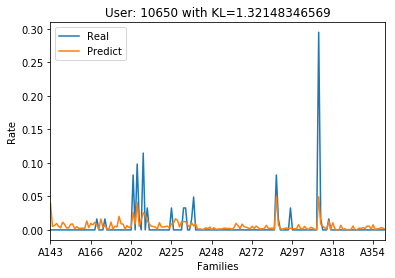

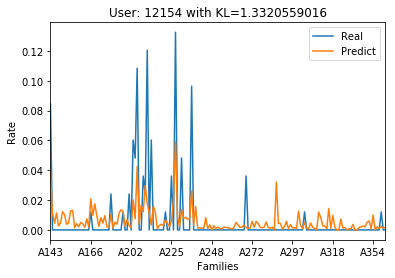

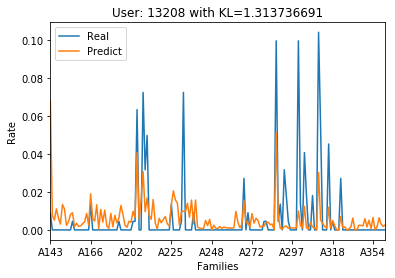

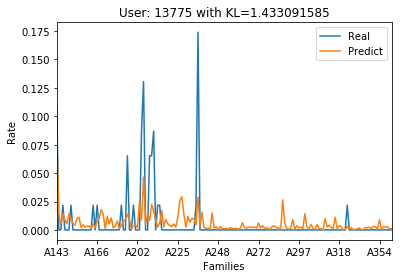

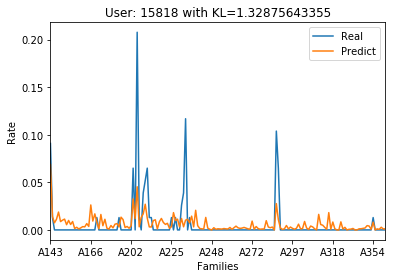

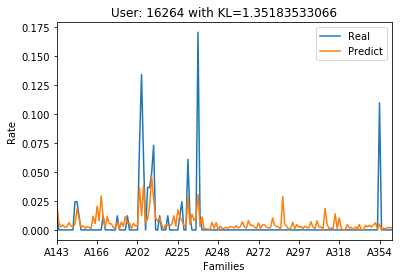

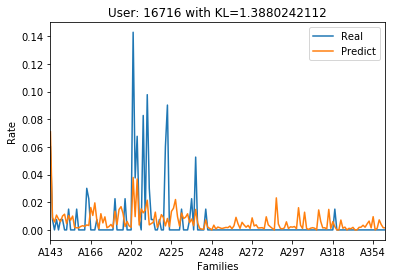

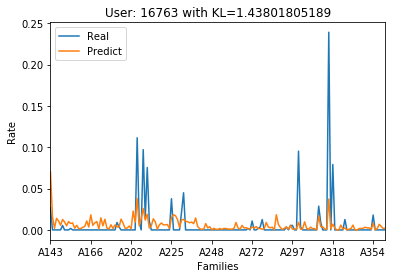

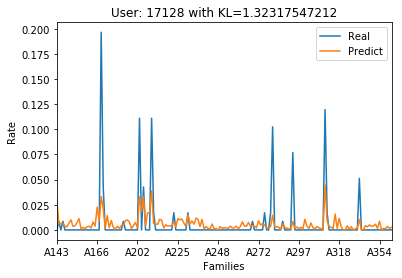

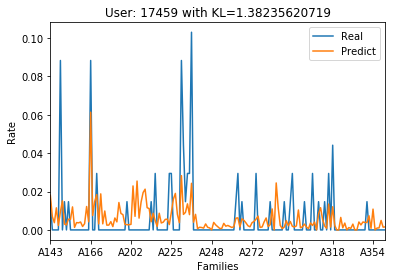

In [12]:
#real distribution versus predicted distribution with $1.2<KL(P||Q)<1.4$.
for user in posible_users["Cliente"][:10]:
    ax1=ratings[area_colnames].loc[user].plot()
    ax2=pred_df.loc[user].plot()
    ax1.set_xlabel("Families")
    ax1.set_ylabel("Rate")
    plt.title("User: " + str(user)+ " with KL="+str(kl(ratings[area_colnames].loc[user], pred_df.loc[user])))
    plt.legend(["Real", "Predict"])
    plt.savefig("../KL_images/mean/User:" + str(user) + ".png")
    plt.show()

In [13]:
kl_user["KL"].max()

4.6575370742857931

In [14]:
posible_users=kl_user[kl_user["KL"]>4.0]

/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


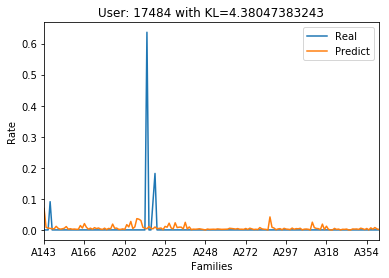

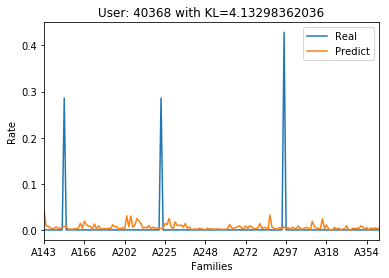

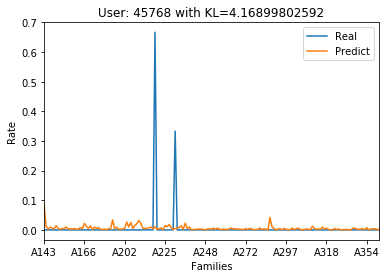

/home/jps/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


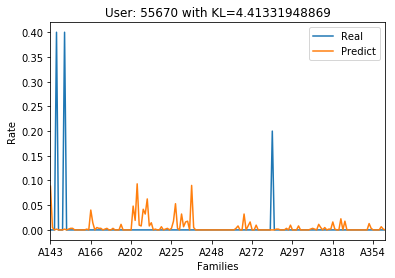

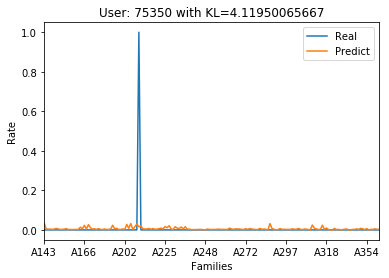

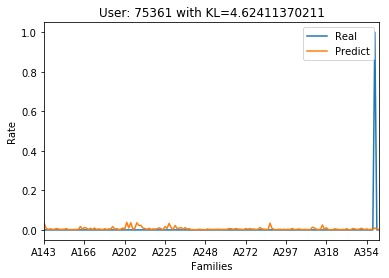

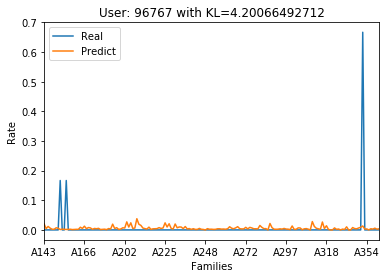

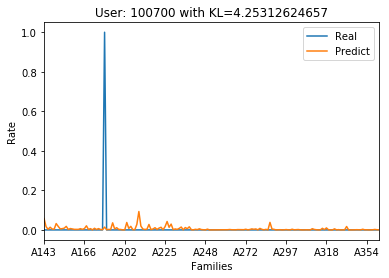

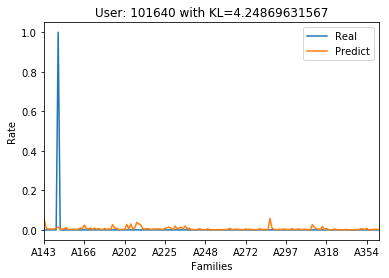

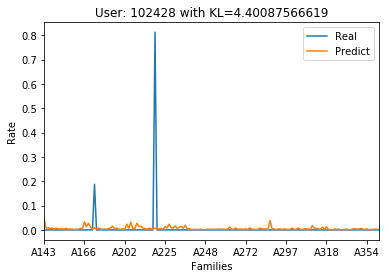

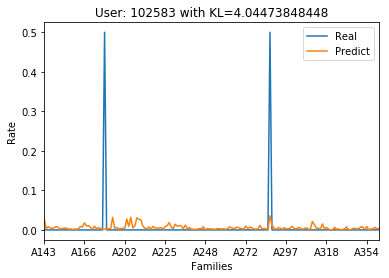

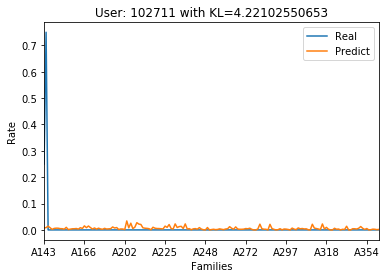

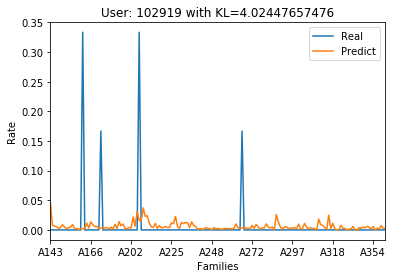

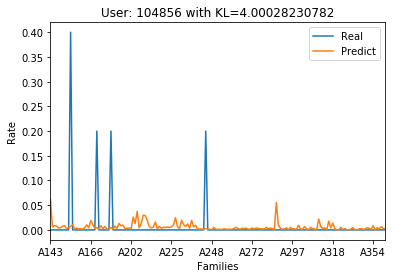

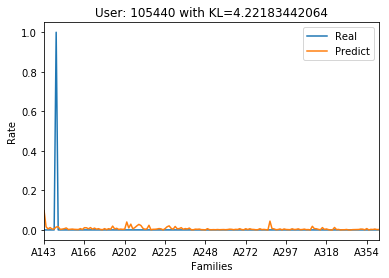

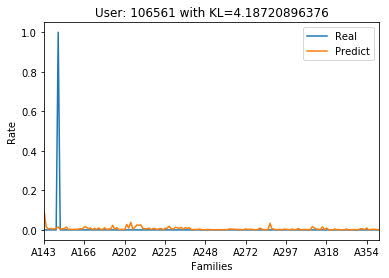

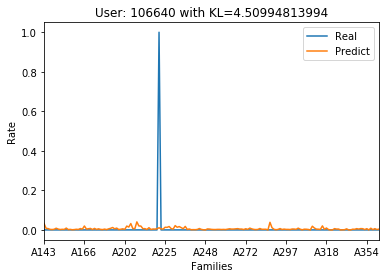

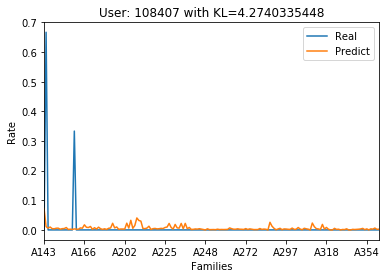

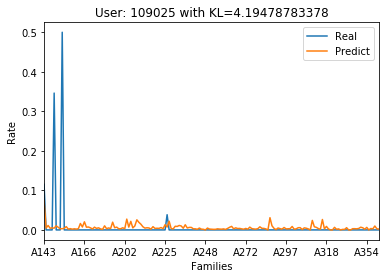

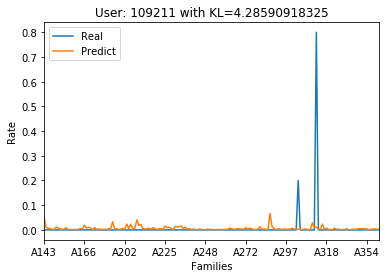

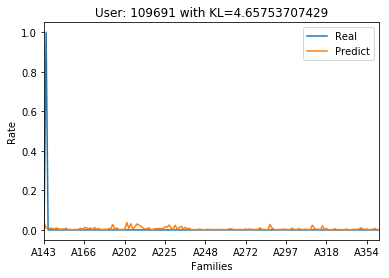

In [15]:
#real distribution versus predicted distribution with $KL(P||Q)>4$.
for user in posible_users["Cliente"]:
    ax1=ratings[area_colnames].loc[user].plot()
    ax2=pred_df.loc[user].plot()
    ax1.set_xlabel("Families")
    ax1.set_ylabel("Rate")
    plt.title("User: " + str(user)+ " with KL="+str(kl(ratings[area_colnames].loc[user], pred_df.loc[user])))
    plt.legend(["Real", "Predict"])
    plt.savefig("../KL_images/outliers/User:" + str(user) + ".png")
    plt.show()